**Exercício Estatístico com Statsmodels**

*Problema de Negócio:*

Existe alguma relação entre a área de imóveis (em metros quadrados) e o valor do aluguel em uma determinada cidade? Caso exista relação, como podemos mensurá-la?

In [8]:
# Instalando a biblioteca Statsmodels
!pip install statsmodels

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [11]:
#Carregando arquivo
df = pd.read_csv("dataset.csv")

In [12]:
df.shape

(3000, 7)

In [13]:
df.columns

Index(['valor_aluguel', 'area_m2', 'ano_construcao', 'codigo_localidade',
       'numero_banheiros', 'numero_cozinhas', 'codigo_bairro'],
      dtype='object')

In [14]:
df.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_aluguel      3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   int64  
 4   numero_banheiros   3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


**Análise Exploratória - Resumo Estatístico**

In [16]:
#Resumo se há valores ausentes
df.isnull().sum()

valor_aluguel        0
area_m2              0
ano_construcao       0
codigo_localidade    0
numero_banheiros     0
numero_cozinhas      0
codigo_bairro        0
dtype: int64

In [ ]:
#Resumo estatístico do dataset
df.describe()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,459.643146,67.363333,1956.321333,1.441000,0.061333,0.042000,1173.798667
std,195.865692,23.675758,22.288136,0.545238,0.239981,0.200623,678.187690
min,40.512820,20.000000,1918.000000,1.000000,0.000000,0.000000,113.000000
25%,320.961530,51.000000,1939.000000,1.000000,0.000000,0.000000,561.750000
50%,426.897435,65.000000,1959.000000,1.000000,0.000000,0.000000,1025.000000
75%,560.282055,81.000000,1972.000000,2.000000,0.000000,0.000000,1714.000000
max,1843.384600,160.000000,1997.000000,3.000000,1.000000,1.000000,2529.000000


In [18]:
#Resumo estatístico na variável alvo
df['valor_aluguel'].describe()

count    3000.000000
mean      459.643146
std       195.865692
min        40.512820
25%       320.961530
50%       426.897435
75%       560.282055
max      1843.384600
Name: valor_aluguel, dtype: float64

<Axes: xlabel='valor_aluguel', ylabel='Count'>

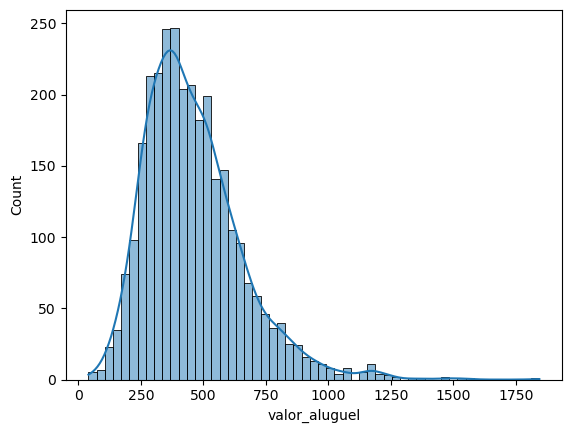

In [19]:
#Histograma da variável alvo
sns.histplot(data = df, x = 'valor_aluguel', kde = True)

In [23]:
#Correlação entre as variáveis
correlacao = df.corr()

<Axes: >

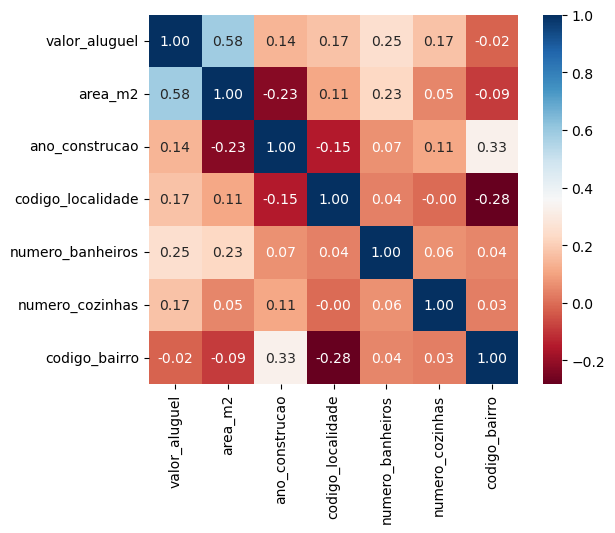

In [ ]:
#Mapa de calor (Correlação)
sns.heatmap(correlacao, cmap = 'RdBu', fmt = '.2f', square = True, linecolor = 'white', annot = True)

*Um coeficiente de correlação igual a 1 indica uma correlação linear perfeita positiva, ou seja, quando uma variável aumenta, a outra variável também aumenta na mesma proporção.*

*Um coeficiente de correlação igual a -1, indica uma correlação linear perfeita negativa, ou seja, quando uma variável aumenta, a outra variável diminui na mesma proporção.*

*Coeficiente igual a 0 sugere que não há correlação.*

**É notado que a variável que contém a maior correlação com a nossa variável alvo, é a area_m2. Portanto ela será escolhida como variável de entrada.**

<Axes: xlabel='area_m2', ylabel='valor_aluguel'>

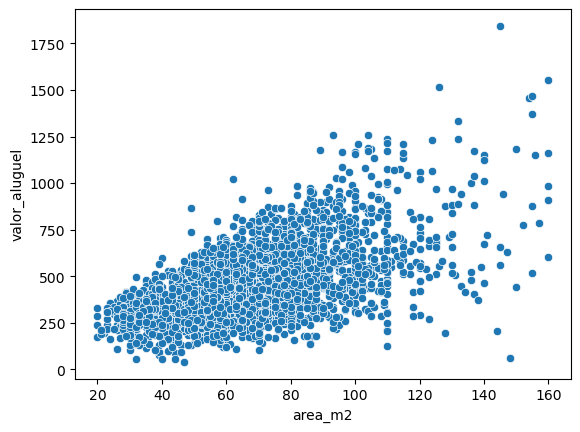

In [ ]:
#Analisando a relação entre a variável de entrada (explicativa) area_m2 e a variável alvo valor_aluguel
sns.scatterplot(data = df, x = 'area_m2', y = 'valor_aluguel')

**Regressão Linear Simples**

*O modelo construindo será OLS (Método dos mínimos quadrados ordinários) com Statsmodels*

In [ ]:
#Definindo a variável dependente (Saída)
y = df['valor_aluguel']

In [ ]:
#Definindo a variável independente (Entrada)
X = df['area_m2']

In [29]:
#O Statmodels requer a adição de uma constante à variável independente
X = sm.add_constant(X)

In [30]:
#Criando o modelo
modelo = sm.OLS(y, X)

*y: Um array ou pandas Series representando a variável dependente (variável resposta ou alvo). É a variável que você deseja prever ou explicar com base nas variáveis independentes.*

*X: Um array ou pandas DataFrame representando a variável independente (explicativas ou preditoras). São as variáveis que você deseja usar para explicar ou prever a variável dependente.*

In [31]:
#Treinamento do modelo
resultado = modelo.fit()

In [32]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          6.84e-275
Time:                        23:05:29   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.0

**Interpretando o Resultado do Modelo Estatístico com Statsmodels**
A tabela acima traz um resumo do modelo com diversas estatísticas. Farei uma análise do R²

*R² = 0: Nesse caso, o modelo não explica nenhuma variação na variável dependente. Isso significa que o modelo não é útil para prever ous explicar a variável de interesse.*

*R² = 1: O modelo explica toda a variação na variável dependente. Isso indica que o modelose ajusta perfeitamente aos dados e é extremamente útil para prever ou explicar a variável de interesse.*

É importante notar que um R² alto não garante que o modelo seja adequado, nem que haja uma relação casual entre as variáveis. Um R² alto pode ser resultado de variáveis irrelevantes, multicolineridade ou até mesmo de um ajuste excessivo.

**Reposta da pergunta de negócio:**

*O valor P contido na tabela mostra um valor menor ao nível de significância da variável, aqui usando 0.05. Observando area_m2 nota-se ela mostrando o valor de 0.000, portanto, essa variável (area_m2) é relevante para compreender o valor_aluguel.*

*O valor R² mostra-se um valor de 0.342, significa que o modelo não explica totalmente a variação da variável alvo.*

**Logo area_m2 sozinha não é suficiente para explicar completamente o comportamenteo da variável alvo.**

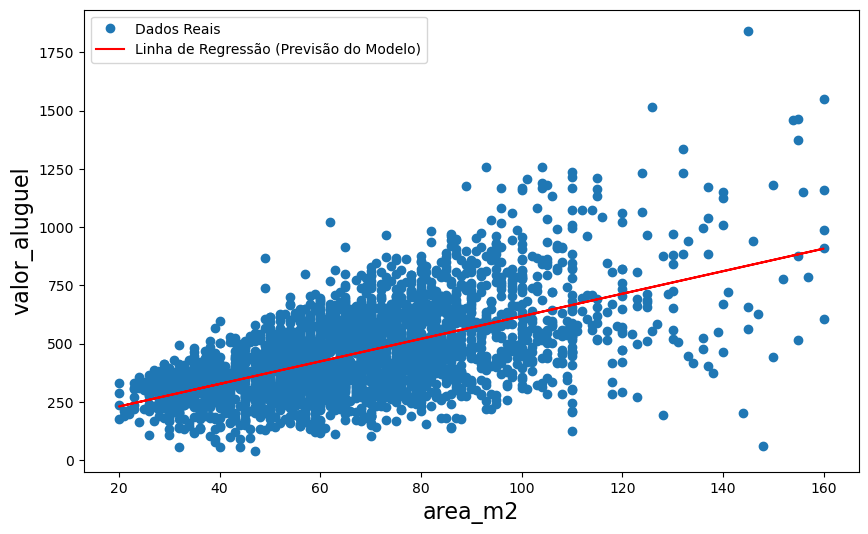

In [35]:
#Gráfico da Regressão
plt.figure(figsize = (10, 6))
plt.xlabel('area_m2', size = 16)
plt.ylabel('valor_aluguel', size = 16)
plt.plot(X['area_m2'], y, 'o', label = 'Dados Reais')
plt.plot(X['area_m2'], resultado.fittedvalues, 'r-', label = "Linha de Regressão (Previsão do Modelo)")
plt.legend(loc = 'best')
plt.show()

**Conclusão do Exercício**

*Claramente existe uma forte relação entre a área (em m2) dos imóveis e o valor do aluguel. Entretanto, apenas a área de imóveis não é suficiente para explicar a variação no valor do aluguel, pois o modelo obteve um coeficiente de determinação (R²) de apenas 0.34.*